In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

def derivativeSigmoid(x):
  return x*(1-x)

In [3]:
x=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y=np.array([[0],[1],[1],[0]])

x

array([[1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [4]:
x.T

array([[1, 1, 1, 1],
       [0, 0, 1, 1],
       [0, 1, 0, 1]])

In [5]:
y

array([[0],
       [1],
       [1],
       [0]])

In [6]:
class NeuralNetwork:
  def __init__(self,i,j,k,eeta):
    self.inputSize=i
    self.hiddenSize=j
    self.outputSize=k
    self.learningRate=eeta

    self.w_ji = np.random.randn(self.inputSize,self.hiddenSize)
    self.w_kj = np.random.randn(self.hiddenSize,self.outputSize)

  def feedForward(self,x):
    self.net_ji = np.dot(x,self.w_ji)
    self.a_ji = sigmoid(self.net_ji)
    self.net_kj = np.dot(self.a_ji,self.w_kj)
    self.a_kj = sigmoid(self.net_kj)
    return self.a_kj

  def backProp(self,x,y,predicted):
    self.output_error = y - predicted
    self.delta_k = self.output_error*derivativeSigmoid(predicted)   
    self.net_o = self.delta_k.dot(self.w_kj.T)   
    self.delta_j = self.net_o*derivativeSigmoid(self.a_ji)

    self.w_ji += self.learningRate*x.T.dot(self.delta_j)
    self.w_kj += self.learningRate*self.a_ji.T.dot(self.delta_k)
    
  def train(self,x,y):
    predict = self.feedForward(x)
    self.backProp(x,y,predict)

In [11]:
nn=NeuralNetwork(3,2,1,0.01)

[[0.]
 [1.]
 [1.]
 [0.]]


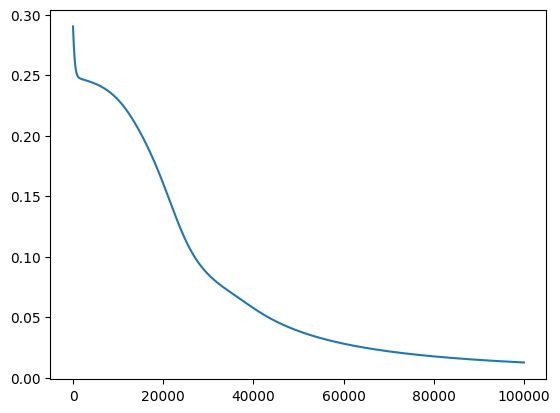

In [12]:
costs=[]

for i in range(100000):
  c = np.mean(np.square(y-nn.feedForward(x)))
  costs.append(c)
  nn.train(x, y)

print(np.round(nn.feedForward(x)))
plt.plot(costs)